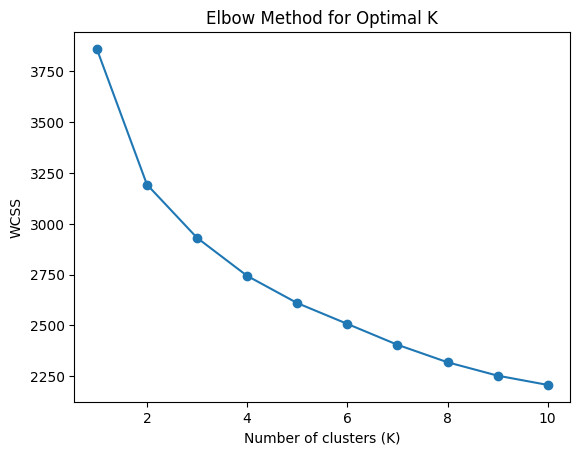

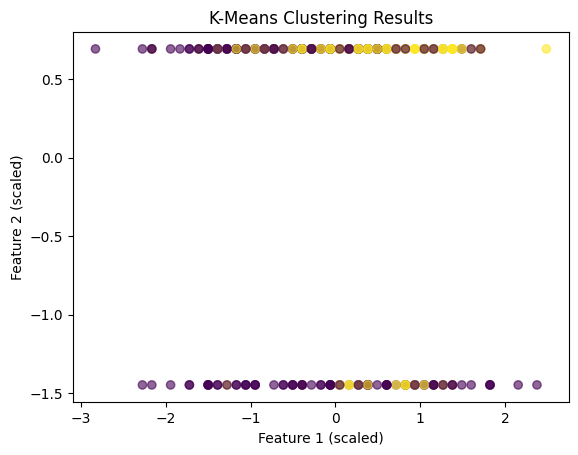

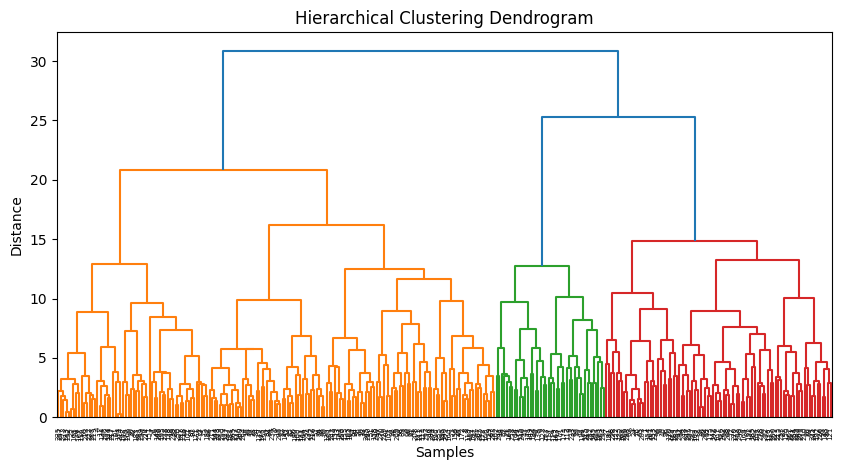


K-Means Cluster vs Actual Target:
target            0    1
KMeans_Cluster          
0               147   37
1                13  100

Hierarchical Cluster vs Actual Target:
target                  0   1
Hierarchical_Cluster         
1                     117  51
2                      43  86


K-Means Silhouette Score: 0.18
Hierarchical Silhouette Score: 0.13


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score


# -----------------------------
# 1. Load dataset (with target)
# -----------------------------
df = pd.read_csv("../data/cleaned_heart_binary.csv")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 2. K-Means Clustering + Elbow Method
# -----------------------------
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.show()

# Apply KMeans with chosen K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_km = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_km, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

# -----------------------------
# 3. Hierarchical Clustering
# -----------------------------
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Form 2 clusters
clusters_hc = fcluster(linkage_matrix, t=2, criterion='maxclust')

# -----------------------------
# 4. Compare clusters with actual target
# -----------------------------
df["KMeans_Cluster"] = clusters_km
df["Hierarchical_Cluster"] = clusters_hc

print("\nK-Means Cluster vs Actual Target:")
print(pd.crosstab(df["KMeans_Cluster"], df["target"]))

print("\nHierarchical Cluster vs Actual Target:")
print(pd.crosstab(df["Hierarchical_Cluster"], df["target"]))

# K-Means silhouette score
sil_score_km = silhouette_score(X_scaled, clusters_km)
print(f"\n\nK-Means Silhouette Score: {sil_score_km:.2f}")

# Hierarchical silhouette score
sil_score_hc = silhouette_score(X_scaled, clusters_hc)
print(f"Hierarchical Silhouette Score: {sil_score_hc:.2f}")



📝 Clustering Results:

🔹 K-Means groups patients based on feature similarity. The “elbow” graph helps pick the number of clusters (K). Cluster labels roughly align with disease vs. healthy, but not perfectly.

🌳 Hierarchical Clustering builds a dendrogram showing how patients merge step by step. Cutting the tree gives flat clusters, which can also be compared to actual labels.

📊 Crosstabs show how clusters match real disease labels. 
🖼 Scatter plots visualize cluster separation in 2D. Overlap is normal because data is multi-dimensional.

📝 Silhouette Score:
🔹 Measures how well each point fits its cluster compared to others.
 🔹 Ranges from -1 to 1:
     ✅ ~1 : Excellent, points well-separated
     👍 0.5–0.7 : Good clustering
     ⚠️ 0.25–0.5 : Fair, some overlap
     ❌ <0.25 : Poor clustering, many misassigned points
🔹 Useful for evaluating K-Means, Hierarchical, or any clustering method